# Power law linear models

本节需要的包：


In [1]:
require(s20x)
library(s20x)


载入需要的程辑包：s20x



那些鱼在 Hauraki(墨西哥湾) Gulf 就知道最低法定大小保持 30 厘米鲷鱼（小于 30 厘米的鱼禁止捕捞）。在这里，我们想使用鲷鱼长度解释鲷鱼的重量，特别是我们要估计 30 厘米鲷鱼的重量。


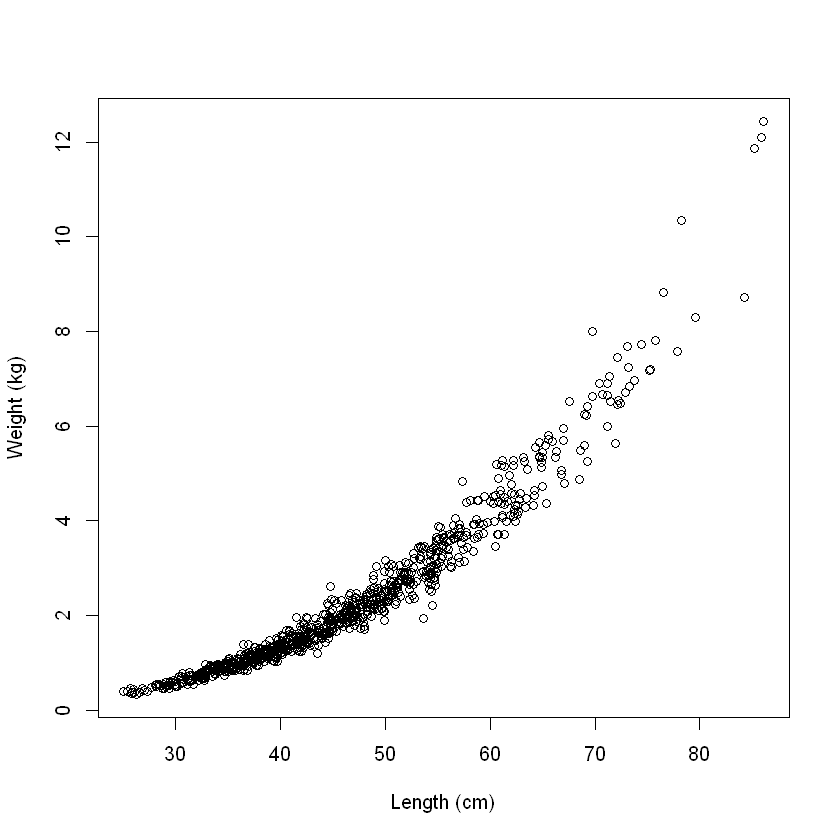

In [2]:
Snap.df <- read.table("../data/SnapWgt.txt", header = TRUE)
plot(wgt ~ len, data = Snap.df, xlab = "Length (cm)", ylab = "Weight (kg)")


显然有一个非线性的重量和长度之间的关系。几何告诉我们，如果一个对象的总体规模变化，同时却保持相同的形状（即同样的比率高、深度和长度），那么它的体积会增加长度的 3 次方。

- For a cube with sides of length l, $volume = len^3$.
- For a sphere with radius r, $volume = \frac{4}{3} \pi r^3$.

你们中那些已经被鲷鱼知道他们会表现出一个小变化在形状变得越来越大，所以最好使用模型：

$$
weight = \alpha \times length^{\beta_1}
$$

$β_1$ 可能接近常数，但不一定等于 3。

Taking logs gives

$$
\log(weight) = \log(\alpha) + \beta \log(length)
$$

which we can rewrite as:

$$
\log(weight) = \beta_0 + \beta_1 \log(length)
$$


The above formula should be of very familiar form to you by now. Provided that we make the assumption that $ε ~ N(0, σ)$ then this isprecisely the simple linear regression model with response variable $log(weight)$ and explanatory variable $log(len)$.


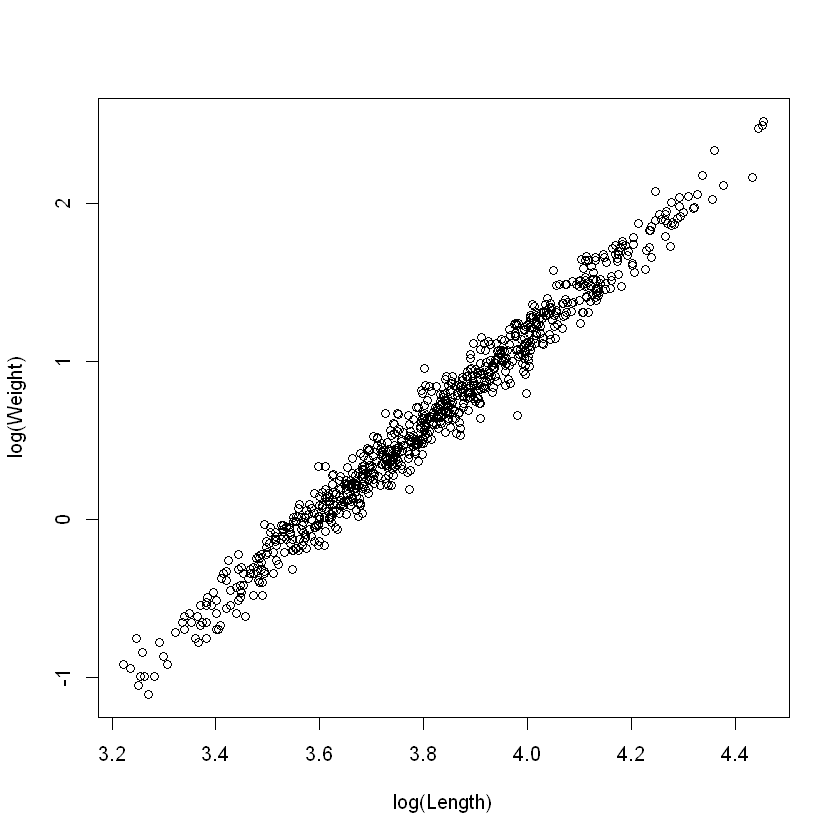

In [4]:
plot(
    log(wgt) ~ log(len),
    data = Snap.df,
    xlab = "log(Length)",
    ylab = "log(Weight)"
)


看起来这样取对数后有很好的线性关系。接下来我们将建模 + 检验三步走：


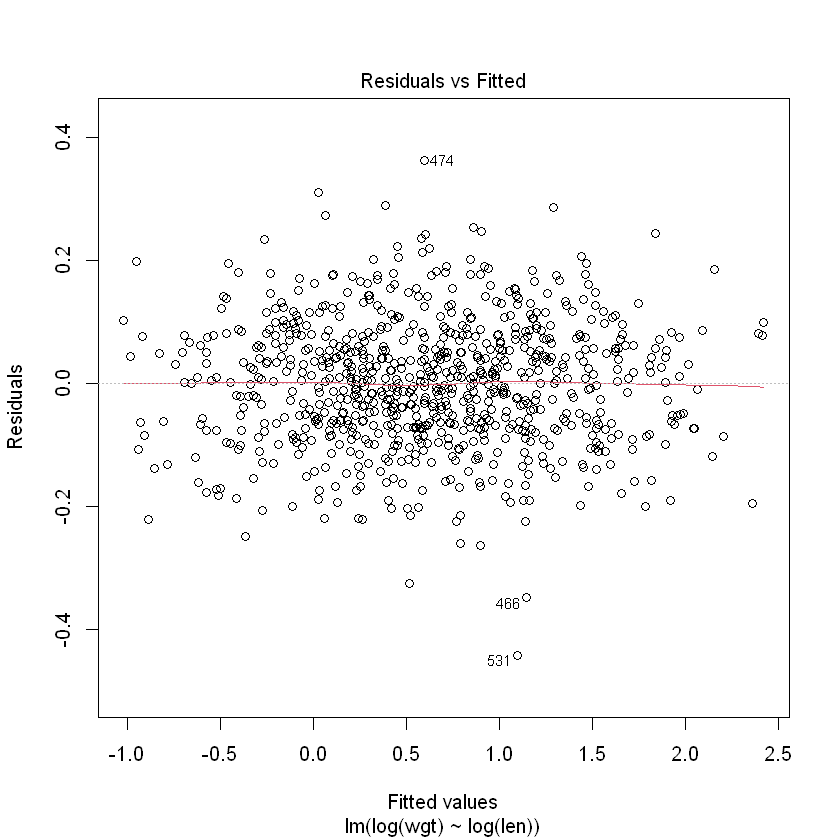

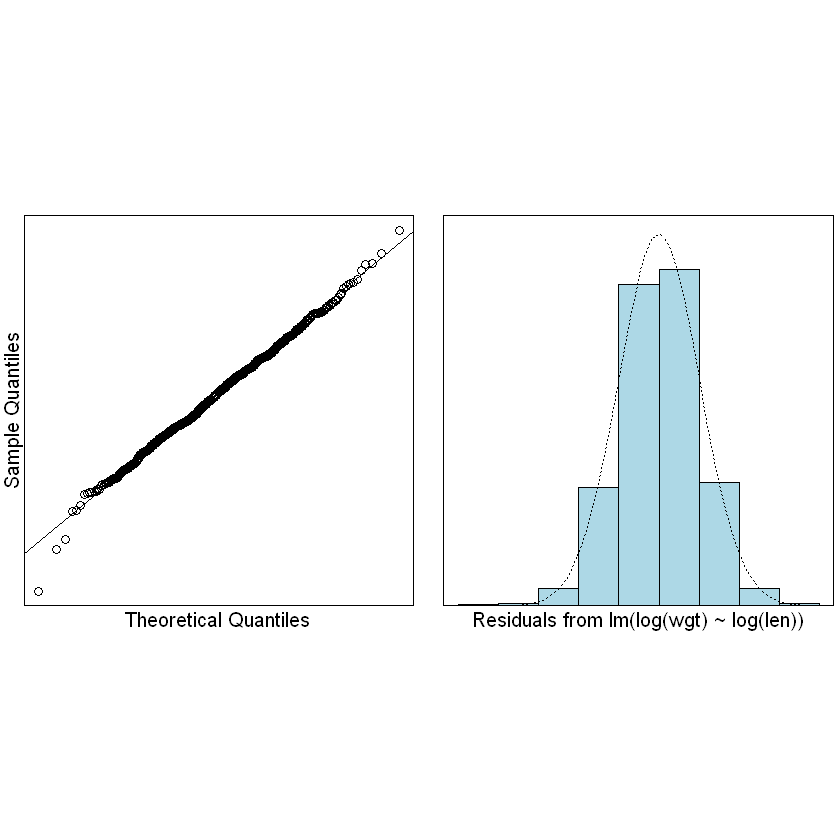

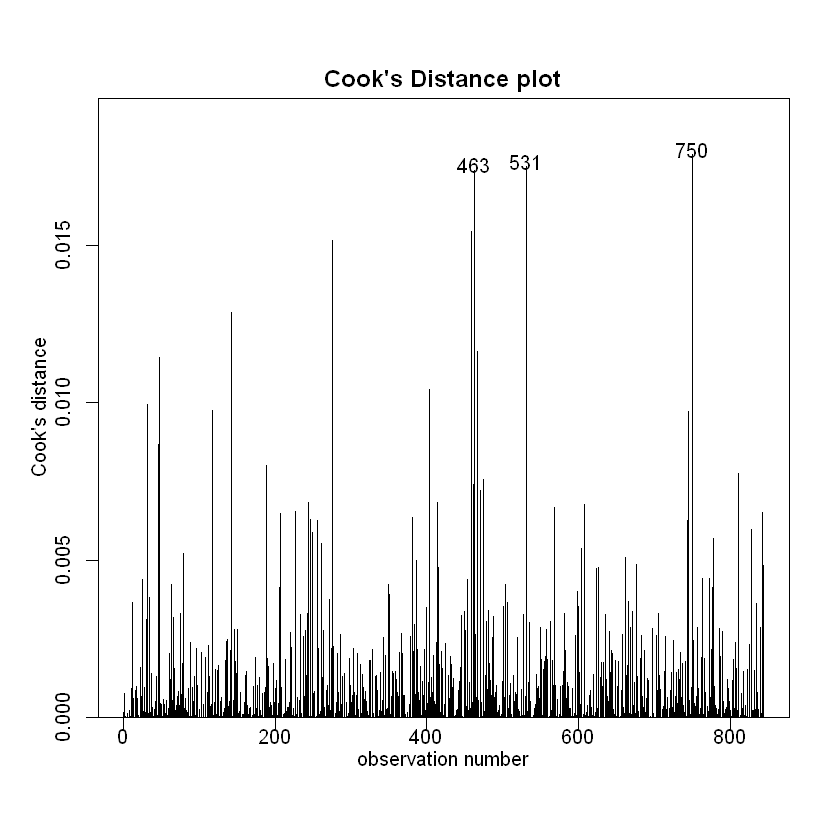

In [5]:
Snap.lm <- lm(log(wgt) ~ log(len), data = Snap.df)
plot(Snap.lm, which = 1)
normcheck(Snap.lm)
cooks20x(Snap.lm)



Call:
lm(formula = log(wgt) ~ log(len), data = Snap.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44099 -0.06853  0.00234  0.06942  0.36139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.01416    0.05602  -178.7   <2e-16 ***
log(len)      2.79104    0.01469   190.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1012 on 842 degrees of freedom
Multiple R-squared:  0.9772,	Adjusted R-squared:  0.9772 
F-statistic: 3.609e+04 on 1 and 842 DF,  p-value: < 2.2e-16


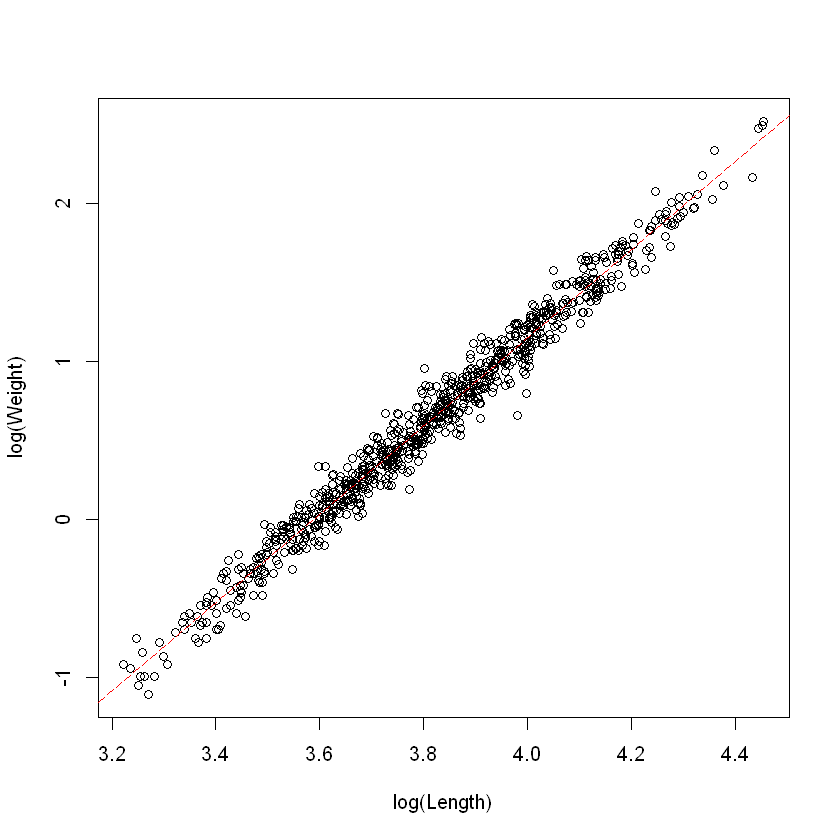

In [7]:
summary(Snap.lm)
plot(log(wgt) ~ log(len), data = Snap.df, xlab = "log(Length)", ylab = "log(Weight)")
abline(coef(Snap.lm), lty = 5, col = "red")


Let us redo the plot on the raw scale (rather than log scale):


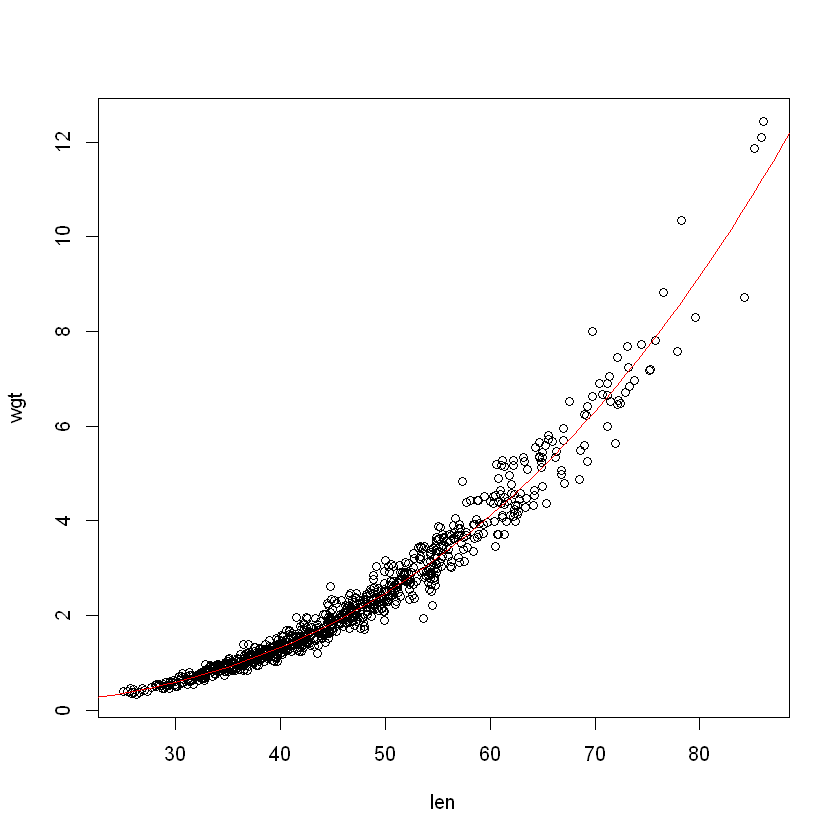

In [8]:
plot(wgt ~ len, data = Snap.df)
pred.df <- data.frame(len = 20:90)
Snap.pred <- exp(predict(Snap.lm, pred.df))
lines(pred.df$len, Snap.pred, col = "red")


In [9]:
Pred.df <- data.frame(len = 30)
exp(predict(Snap.lm, Pred.df, interval = "confidence"))
exp(predict(Snap.lm, Pred.df, interval = "prediction"))


,fit,lwr,upr
1,0.5937602,0.5857844,0.6018445


,fit,lwr,upr
1,0.5937602,0.4865954,0.7245262


A few slides earlier we deduced(推断) that the power coefficient(系数) should be β1 close to, though not necessarily equal to 3.

Let us examine this formally by testing the null hypothesis $H_0 : β_1 = 3$.

Question 1: Is this hypothesis rejected at the 5% level? (Hint: the answer can be worked out from output already seen)

Question 2: What is the P-value for $H_0 : β_1 = 3$? (This takes a bit more work)
